# Lectura de dataset JSON

In [1]:
def read_file(filename):
  '''Read file .JSON and return a list of dictionaries'''
  import json
  # Opening JSON file
  f = open(filename)
  data = json.load(f)
  # Closing file
  f.close()
  return data

In [ ]:
data = read_file('Comment-2021-12-26.json')
data

In [ ]:
len(data)

# Lectura dataset CSV

In [ ]:
import numpy as np
import pandas as pd
# descargar dataset http://comment-face.herokuapp.com/
df = pd.read_csv('Comments-2022-03-21.csv') 
data = df
data

# Preprocesamiento del Dataset

In [ ]:
!pip install emoji==1.6.3

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
import functools
import operator
import re
import emoji
from string import punctuation
from collections import Counter
import numpy as np

def pad_features(comments_ints, seq_length):
    ''' Return features of comments_ints, where each comment is padded with 0's 
        or truncated to the input seq_length.
    '''
    # getting the correct rows x cols shape
    features = np.zeros((len(comments_ints), seq_length), dtype=int)
    for i, row in enumerate(comments_ints):
        features[i, -len(row):] = np.array(row)[:seq_length]
    return features


def encoding_words(comment, vocab):
  '''use the vocab to tokenize each the comment
  Returns tokenized comment as comment_int'''
  comments_ints = [vocab[word] if word in vocab.keys() else 0 for word in comment.split()]
  return comments_ints

def dictionary_int(text):
  '''Build a dictionary that maps words to integers'''
  words = text.split()
  print(len(words))
  counts = Counter(words) #the words and their counts are stored as dictionary values
  print(counts, len(counts))
  vocabulary = sorted(counts.keys()) #words ordered alphabetically
  vocab_to_int = {word: ii for ii, word in enumerate(vocabulary, 1)}
  return vocab_to_int

def get_cleantext(text):
  '''Get text(comment). Returns the clean text'''
  text = text.lower() #lowercase, standardize
  split_emoji = emoji.get_emoji_regexp().split(text)#separate emojis from text)
  split_whitespace = [substr.split() for substr in split_emoji]#split emojis together
  list_text = functools.reduce(operator.concat, split_whitespace)#delete withespace caused by emojis
  new_list = []
  p = re.compile(r'[a-z-áéíóúñ]+')#search only words
  for word in list_text:
    if not emoji.is_emoji(word):
      word = ' '.join(p.findall(word)) #example  "mensaje...con" split = "mensaje con"
      word = re.sub(r'([abdefghijkmopqsu-zÀ-ÿ])\1{1,}', r'\1', word)
      if 'jaja' in word:
        word = 'jaja'
      if 'jeje' in word:
        word = 'jeje'
      if 'jiji' in word:
        word = 'jiji'
      #word = re.sub(r'([aceilnor])\1{2,}', r'\1', word)
    new_list.append(word)
  text = ' '.join(new_list)
  return text

def foo(data):
  '''get list of dictionaries. Returns a list of numbers corresponding to the vocabulary'''
  list_comment = [item.lower() for item in data['Comment']]
  list_comment = [get_cleantext(comment) for comment in list_comment]
  all_text = ' '.join(list_comment)
  vocab = dictionary_int(all_text)
  list_comment_ints = [encoding_words(comment,vocab) for comment in list_comment]
  array_comments = pad_features(list_comment_ints, seq_length=70) #define length for comments
  labels = np.array([1 if item == 'positive' else 0 for item in data['Sentiment']])
  return array_comments, labels, vocab, list_comment_ints


In [ ]:
from string import punctuation
print(punctuation)

In [ ]:
f = open("vocab.json","w")
f.write( str(vocab) )
f.close()

In [ ]:
get_cleantext('holaaa CÓMO ESTÁS 222 jajajaajaja ejejej 😃!!..')

'hola cómo estás  jaja jeje 😃 '

In [ ]:
features, labels, vocab, list_comment_ints = foo(data)

50284
Counter({'que': 1899, 'de': 1584, 'y': 1467, 'la': 1336, 'a': 1313, 'los': 1057, 'no': 1046, 'el': 918, 'en': 746, 'se': 704, 'es': 601, 'para': 526, 'lo': 515, 'q': 504, 'un': 469, 'por': 456, 'con': 408, 'una': 359, 'las': 353, 'si': 308, 'todo': 258, 'como': 245, 'su': 230, 'son': 227, 'todos': 226, 'al': 218, 'le': 214, '👏': 206, 'más': 201, 'gente': 198, 'pero': 192, 'hay': 190, 'te': 189, 'me': 186, 'esta': 180, 'del': 174, 'bien': 167, 'ya': 161, 'ni': 151, 'nada': 148, 'les': 147, 'sus': 147, 'este': 142, 'muy': 141, 'tienen': 140, '😡': 140, 'eso': 137, 'o': 136, 'siempre': 134, 'x': 126, 'tiene': 125, 'ser': 124, 'dios': 115, 'jujuy': 111, 'tu': 107, 'cuando': 105, 'nos': 103, 'van': 102, 'mas': 101, 'estos': 100, 'va': 98, 'hacer': 95, 'ahora': 94, 'vida': 94, 'están': 92, 'sin': 91, 'hace': 91, 'mi': 91, 'esa': 88, 'está': 86, 'así': 86, 'solo': 85, 'gobierno': 81, 'hacen': 80, 'porque': 80, 'felicidades': 79, 'ese': 78, 'mal': 78, 'ellos': 77, 'nadie': 73, 'felicitaci

Text(0.5, 1.0, 'Histograma')

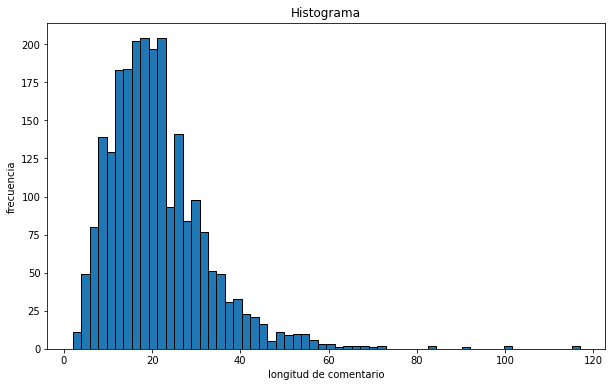

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.hist(list(map(len, list_comment_ints)), bins=60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.xlabel("longitud de comentario")
plt.ylabel("frecuencia")
plt.title("Histograma")

In [ ]:
# separar emojis juntos, eliminar numeros y 'mensaje...mensaje'
msj = 'Este es un mensaje...con este problema😃😃😃 222 pero igual!!! '
msj = get_cleantext(msj)
msj = encoding_words(msj,vocab)
msj

In [ ]:
len(vocab)

In [ ]:
#guardar como diccionario
import pickle
with open('vocab.pkl', 'wb') as f:
    pickle.dump(vocab, f)

# Datos de Entrenamiento, Validación y Prueba

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader

def get_sets(features, labels, batch_size, split_frac):
  '''Returns sets training, validation, and test data (features and labels, x and y)'''
  split_idx = int(len(features)*split_frac) #quantity of data for training
  train_x, remaining_x = features[:split_idx], features[split_idx:]
  train_y, remaining_y = labels[:split_idx], labels[split_idx:]

  test_idx = int(len(remaining_x)*0.5)
  val_x, test_x = remaining_x[:test_idx], remaining_x[test_idx:]
  val_y, test_y = remaining_y[:test_idx], remaining_y[test_idx:]
  
  # remove the lasts batch if not has completed
  train_x = train_x[:int(split_idx/batch_size)*batch_size]
  train_y = train_y[:int(split_idx/batch_size)*batch_size]

  val_x = val_x[:int(test_idx/batch_size)*batch_size]
  val_y = val_y[:int(test_idx/batch_size)*batch_size]

  test_x = test_x[:int(test_idx/batch_size)*batch_size]
  test_y = test_y[:int(test_idx/batch_size)*batch_size]

  ## print out the shapes of your resultant feature data
  print("\t\t\tFeature Shapes:")
  print("Train set: \t\t{}".format(train_x.shape), 
      "\nValidation set: \t{}".format(val_x.shape),
      "\nTest set: \t\t{}".format(test_x.shape))
  
  # create Tensor datasets
  train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
  valid_data = TensorDataset(torch.from_numpy(val_x), torch.from_numpy(val_y))
  test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))
  
  # make sure the SHUFFLE your training data
  train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
  valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)
  test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

  return train_loader, valid_loader, test_loader
 

In [ ]:
batch_size=5
train_loader, valid_loader, test_loader = get_sets(features, labels, batch_size, split_frac=0.8)
print('')
print('cantidad lotes del train_loader', len(train_loader))
print('cantidad lotes del valid_loader', len(valid_loader))
print('cantidad lotes del test_loader', len(test_loader))

			Feature Shapes:
Train set: 		(1895, 70) 
Validation set: 	(235, 70) 
Test set: 		(235, 70)

cantidad lotes del train_loader 379
cantidad lotes del valid_loader 47
cantidad lotes del test_loader 47


In [ ]:
cont =0
for inputs, labels in train_loader:
  cont+=1
  print(labels, cont) 

In [ ]:
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()

print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

## Modelo de Red RNN

In [ ]:
# First checking if GPU is available
train_on_gpu=torch.cuda.is_available()

if(train_on_gpu):
    print('Training on GPU.')
else:
    print('No GPU available, training on CPU.')

Training on GPU.


In [ ]:
import torch.nn as nn

class SentimentRNN(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.3):
        """
        Initialize the model by setting up the layers.
        """
        super(SentimentRNN, self).__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True)
        
        # dropout layer
        self.dropout = nn.Dropout(0.3)
        
        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Sigmoid()
        

    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)

        # embeddings and lstm_out
        x = x.long()
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
        
        lstm_out = lstm_out[:, -1, :] # getting the last time step output
        
        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        # sigmoid function
        sig_out = self.sig(out)
        
        # return last sigmoid output and hidden state
        return sig_out, hidden
    
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden

# Inicializacion de la red
* `vocab_size`: Tamaño del vocabulario o rango de valores para nuestra entrada, tokens de palabras.
* `output_size`: Tamaño de la salida deseada (pos / neg).
* `embedding_dim`: Número de columnas en la tabla de embedding.
* `hidden_dim`: Número de nodos en capas ocultas. Por lo general, más grande tiene un mejor rendimiento. Los valores comnues son 128, 256, 512, etc.
* `n_layers`: Número de capas LSTM en la red. Normalmente entre 1-3


In [ ]:
vocab_size = len(vocab)+1 # +1 for the 0 padding + our word tokens
output_size = 1
embedding_dim = 50
hidden_dim = 128
n_layers = 4

net = SentimentRNN(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)

print(net)

SentimentRNN(
  (embedding): Embedding(7850, 50)
  (lstm): LSTM(50, 128, num_layers=4, batch_first=True, dropout=0.3)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=128, out_features=1, bias=True)
  (sig): Sigmoid()
)


## Training

* `lr`: Tasa de aprendizaje.
* `epochs`: Número de veces que se itera a través del conjunto de datos de entrenamiento.
* `clip`: El valor de degradado máximo al que se recortará (para evitar la explosión de degradados).

In [ ]:
def training_net(net, batch_size, train_loader, valid_loader):
  lr=0.001
  criterion = nn.BCELoss()
  optimizer = torch.optim.Adam(net.parameters(), lr=lr)
  epochs = 10
  counter = 0
  print_every = 100
  clip=5 # gradient clipping

  # move model to GPU, if available
  if(train_on_gpu):
    net.cuda()
  net.train()

  train_losses, test_losses = [], []
  # train for some number of epochs
  for e in range(epochs):
    running_loss = 0 #######
    # initialize hidden state
    h = net.init_hidden(batch_size)    
    
    # batch loop    
    for inputs, labels in train_loader: 
      counter += 1
      if(train_on_gpu):  
        inputs, labels = inputs.cuda(), labels.cuda()
      
      # Creating new variables for the hidden state, otherwise
      # we'd backprop through the entire training history
      h = tuple([each.data for each in h])
      
      # zero accumulated gradients
      net.zero_grad()

      # get the output from the model
      output, h = net(inputs, h)
      # calculate the loss and perform backprop
      loss = criterion(output.squeeze(), labels.float())
      loss.backward()

      # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
      nn.utils.clip_grad_norm_(net.parameters(), clip)
      optimizer.step()
      running_loss += loss.item()
      
      # loss stats
      if counter % print_every == 0:
        # Get validation loss
        val_h = net.init_hidden(batch_size)
        val_losses = []
        net.eval()
        for inputs, labels in valid_loader:
          
          # Creating new variables for the hidden state, otherwise
          # we'd backprop through the entire training history
          val_h = tuple([each.data for each in val_h])
          if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()            
          output, val_h = net(inputs, val_h)          
          val_loss = criterion(output.squeeze(), labels.float())

          val_losses.append(val_loss.item())

        net.train()
        print("Epoch: {}/{}...".format(e+1, epochs),
                "Step: {}...".format(counter),
                "Loss: {:.6f}...".format(loss.item()),
                "Val Loss: {:.6f}".format(np.mean(val_losses)))

In [ ]:
#Utilizar este
import matplotlib.pyplot as plt

def training_net1(net, batch_size, train_loader, valid_loader):
  lr=0.001
  criterion = nn.BCELoss()
  optimizer = torch.optim.Adam(net.parameters(), lr=lr)
  epochs = 4
  counter = 0
  print_every = 100
  clip=5 # gradient clipping

  # move model to GPU, if available
  if(train_on_gpu):
    net.cuda()
  net.train()

  train_losses, validation_losses = [], []
  # train for some number of epochs
  for e in range(epochs):
    running_loss = 0
    # initialize hidden state
    h = net.init_hidden(batch_size)    
    
    # batch loop    
    for inputs, labels in train_loader: 
      counter += 1
      if(train_on_gpu):  
        inputs, labels = inputs.cuda(), labels.cuda()
      
      # Creating new variables for the hidden state, otherwise
      # we'd backprop through the entire training history
      h = tuple([each.data for each in h])
      
      # zero accumulated gradients
      net.zero_grad()

      # get the output from the model
      output, h = net(inputs, h)
      # calculate the loss and perform backprop
      loss = criterion(output.squeeze(), labels.float())
      loss.backward()

      # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
      nn.utils.clip_grad_norm_(net.parameters(), clip)
      optimizer.step()
      running_loss += loss.item()
    
    else:
      val_h = net.init_hidden(batch_size)
      val_losses = []      
      with torch.no_grad():
        net.eval()
        for inputs, labels in valid_loader:
          # Creating new variables for the hidden state, otherwise
          # we'd backprop through the entire training history
          val_h = tuple([each.data for each in val_h])
          if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()            
          output, val_h = net(inputs, val_h)          
          val_loss = criterion(output.squeeze(), labels.float())

          val_losses.append(val_loss.item())
      net.train() 
      print("Epoch: {}/{}...".format(e+1, epochs),
              "Step: {}...".format(counter),
              "Loss: {:.6f}...".format(running_loss/len(train_loader)),
              "Val Loss: {:.6f}".format(np.mean(val_losses)))

    train_losses.append(running_loss/len(train_loader))
    validation_losses.append(np.mean(val_losses))
  
  plt.plot(train_losses, label='Training losses')
  plt.plot(validation_losses, label='Validation losses')
  plt.legend(frameon=False)
  


In [ ]:
print(len(train_loader))
print(len(valid_loader))

In [ ]:
training_net1(net, batch_size, train_loader, valid_loader)

# Testing

In [ ]:
def testing(net, test_loader):
  # Get test data loss and accuracy
  test_losses = [] # track loss
  num_correct = 0
  criterion = nn.BCELoss()
  #optimizer = torch.optim.Adam(net.parameters(), lr=lr)
  # init hidden state
  h = net.init_hidden(batch_size)

  net.eval()
  # iterate over test data
  for inputs, labels in test_loader:
      # Creating new variables for the hidden state, otherwise
      # we'd backprop through the entire training history
      h = tuple([each.data for each in h])

      if(train_on_gpu):
          inputs, labels = inputs.cuda(), labels.cuda()
      
      # get predicted outputs
      output, h = net(inputs, h)
    
      # calculate loss
      test_loss = criterion(output.squeeze(), labels.float())
      test_losses.append(test_loss.item())
      
      # convert output probabilities to predicted class (0 or 1)
      pred = torch.round(output.squeeze())  # rounds to the nearest integer
      
      # compare predictions to true label
      correct_tensor = pred.eq(labels.float().view_as(pred))
      correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
      num_correct += np.sum(correct)

  # -- stats! -- ##
  # avg test loss
  print("Test loss: {:.3f}".format(np.mean(test_losses)))

  # accuracy over all test data
  test_acc = num_correct/len(test_loader.dataset)
  print("Length the test data", len(test_loader))
  print("Test accuracy: {:.3f}".format(test_acc))

In [ ]:
testing(net, test_loader)

Test loss: 1.384
Length the test data 47
Test accuracy: 0.851


# Prueba usuario

In [ ]:
def tokenize_comment(comment, vocab):
  test_ints = []
  comment = get_cleantext(comment)
  comment = encoding_words(comment,vocab)
  test_ints.append(comment)  
  comment = pad_features(test_ints, seq_length=100)
  return comment

def predict(net, test_comment, vocab ,sequence_length=100):
    
    net.eval()

    # tokenize review
    features = tokenize_comment(test_comment, vocab)
    
    # print('test int', test_ints)
    # # pad tokenized sequence
    # seq_length=sequence_length
    # features = pad_features(test_ints, seq_length)
    # print(features)
    
    # convert to tensor to pass into your model
    feature_tensor = torch.from_numpy(features)
    
    batch_size = feature_tensor.size(0)
    
    # initialize hidden state
    h = net.init_hidden(batch_size)
    
    if(train_on_gpu):
        feature_tensor = feature_tensor.cuda()
    
    # get the output from the model
    output, h = net(feature_tensor, h)
    
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze()) 
    # printing output value, before rounding
    print('Prediction value, pre-rounding: {:.6f}'.format(output.item()))
    
    # print custom response
    if(pred.item()==1):
        print("Positive review detected!")
    else:
        print("Negative review detected.")
    return output.item()


In [ ]:
test_comment = "✌🏻"
predict(net, test_comment, vocab)

Prediction value, pre-rounding: 0.007691
Negative review detected.


0.007690620608627796

In [ ]:
for key, value in emoj.items():
  emoj[key]=predict(net, key, vocab)

In [ ]:
sorted(emoj.items(), key=lambda x: x[1]) 

In [ ]:
df_emoji = pd.DataFrame(emoj.items(), columns=['emoji', 'prediction'])
df_emoji.sort_values(by=['prediction'])

,emoji,prediction
102,😡,0.000281
153,🤬,0.000687
46,👎,0.000700
107,😫,0.000722
71,💩,0.000981
...,...,...
68,💛,0.999997
6,❤,0.999997
169,🥰,0.999997
47,👏,0.999997


# Descargar modelo

In [ ]:
PATH = "trainedModel.pth"
torch.save(net.state_dict(),PATH)

In [ ]:
#cargar el vocabulario
import pickle
 with open('vocab.pkl', 'rb') as f:
   vocab = pickle.load(f)

In [ ]:
#Cargar modelo
import torch

PATH = "trainedModel.pth"
vocab_size = len(vocab) + 1 # +1 for the 0 padding + our word tokens
output_size = 1
embedding_dim = 400
hidden_dim = 256
n_layers = 2
net = SentimentRNN(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
net.load_state_dict(torch.load(PATH))


In [ ]:
 net = net.to(device='cuda')
 net.eval()

In [ ]:
net.state_dict()